# Simple CNN

# Import libraries

In [2]:
import pickle

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

from training_and_evaluate import train_and_eval

# Prepare Simple CNN model for training

In [3]:
BATCH_SIZE = 32
NUM_OF_WORKERS = 2
NUM_OF_EPOCHS = 40
NAME_OF_MODEL = "simple_cnn"
EARLY_STOPPING_PATIENCE = 15

trainset = datasets.FashionMNIST('data/', download=True, train=True, transform=transforms.ToTensor())
testset = datasets.FashionMNIST('data/', download=True, train=False, transform=transforms.ToTensor())

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda:0


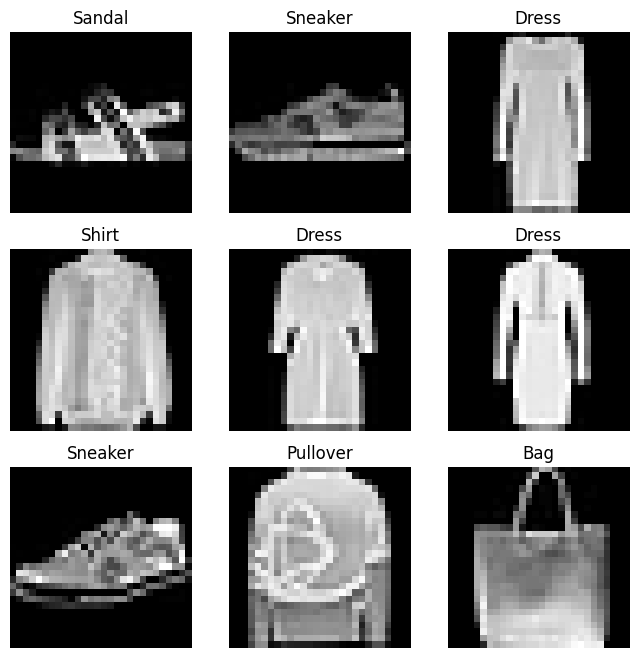

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

## Simple CNN

In [7]:
batch_sizes = [BATCH_SIZE]

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Device: cuda:0
Epoch 1 Training...


100%|██████████| 1875/1875 [00:09<00:00, 190.80it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:04<00:00, 71.23it/s] 


Epoch 1: Train_accuracy: 74.57%, Train_loss: 0.668865, Test_accuracy: 80.92%, Test_loss: 0.525649
Epoch 2 Training...


100%|██████████| 1875/1875 [00:11<00:00, 164.14it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.35it/s] 


Epoch 2: Train_accuracy: 84.31%, Train_loss: 0.426783, Test_accuracy: 85.22%, Test_loss: 0.404164
Epoch 3 Training...


100%|██████████| 1875/1875 [00:12<00:00, 155.24it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:04<00:00, 71.26it/s] 


Epoch 3: Train_accuracy: 86.70%, Train_loss: 0.363980, Test_accuracy: 85.84%, Test_loss: 0.383458
Epoch 4 Training...


100%|██████████| 1875/1875 [00:11<00:00, 162.13it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.59it/s] 


Epoch 4: Train_accuracy: 87.98%, Train_loss: 0.327908, Test_accuracy: 86.90%, Test_loss: 0.352656
Epoch 5 Training...


100%|██████████| 1875/1875 [00:11<00:00, 170.19it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.42it/s] 


Epoch 5: Train_accuracy: 88.74%, Train_loss: 0.304000, Test_accuracy: 87.56%, Test_loss: 0.341728
Epoch 6 Training...


100%|██████████| 1875/1875 [00:11<00:00, 162.24it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.48it/s] 


Epoch 6: Train_accuracy: 89.35%, Train_loss: 0.286021, Test_accuracy: 88.73%, Test_loss: 0.310543
Epoch 7 Training...


100%|██████████| 1875/1875 [00:10<00:00, 172.65it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.02it/s] 


Epoch 7: Train_accuracy: 90.00%, Train_loss: 0.269122, Test_accuracy: 88.89%, Test_loss: 0.309409
Epoch 8 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.24it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.38it/s] 


Epoch 8: Train_accuracy: 90.45%, Train_loss: 0.258186, Test_accuracy: 88.50%, Test_loss: 0.304915
Epoch 9 Training...


100%|██████████| 1875/1875 [00:10<00:00, 176.46it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.55it/s] 


Epoch 9: Train_accuracy: 90.91%, Train_loss: 0.245923, Test_accuracy: 88.98%, Test_loss: 0.301000
Epoch 10 Training...


100%|██████████| 1875/1875 [00:09<00:00, 193.01it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.55it/s] 


Epoch 10: Train_accuracy: 91.16%, Train_loss: 0.235182, Test_accuracy: 89.54%, Test_loss: 0.300684
Epoch 11 Training...


100%|██████████| 1875/1875 [00:10<00:00, 173.72it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.25it/s] 


Epoch 11: Train_accuracy: 91.54%, Train_loss: 0.225904, Test_accuracy: 89.46%, Test_loss: 0.305703
Epoch 12 Training...


100%|██████████| 1875/1875 [00:11<00:00, 166.47it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.20it/s] 


Epoch 12: Train_accuracy: 91.84%, Train_loss: 0.216690, Test_accuracy: 89.53%, Test_loss: 0.292681
Epoch 13 Training...


100%|██████████| 1875/1875 [00:10<00:00, 175.25it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.85it/s] 


Epoch 13: Train_accuracy: 92.12%, Train_loss: 0.211790, Test_accuracy: 88.69%, Test_loss: 0.323604
Epoch 14 Training...


100%|██████████| 1875/1875 [00:10<00:00, 174.31it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.77it/s] 


Epoch 14: Train_accuracy: 92.32%, Train_loss: 0.202992, Test_accuracy: 89.37%, Test_loss: 0.302464
Epoch 15 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.62it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.40it/s] 


Epoch 15: Train_accuracy: 92.46%, Train_loss: 0.198035, Test_accuracy: 89.84%, Test_loss: 0.299173
Epoch 16 Training...


100%|██████████| 1875/1875 [00:10<00:00, 177.44it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.27it/s] 


Epoch 16: Train_accuracy: 92.88%, Train_loss: 0.188004, Test_accuracy: 89.31%, Test_loss: 0.315244
Epoch 17 Training...


100%|██████████| 1875/1875 [00:11<00:00, 170.44it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.36it/s] 


Epoch 17: Train_accuracy: 93.07%, Train_loss: 0.182881, Test_accuracy: 89.48%, Test_loss: 0.319422
Epoch 18 Training...


100%|██████████| 1875/1875 [00:10<00:00, 177.78it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.00it/s] 


Epoch 18: Train_accuracy: 93.25%, Train_loss: 0.177660, Test_accuracy: 89.69%, Test_loss: 0.321126
Epoch 19 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.01it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:04<00:00, 78.06it/s] 


Epoch 19: Train_accuracy: 93.55%, Train_loss: 0.170195, Test_accuracy: 89.77%, Test_loss: 0.312461
Epoch 20 Training...


100%|██████████| 1875/1875 [00:10<00:00, 174.20it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.24it/s] 


Epoch 20: Train_accuracy: 93.72%, Train_loss: 0.165307, Test_accuracy: 89.38%, Test_loss: 0.332034
Epoch 21 Training...


100%|██████████| 1875/1875 [00:10<00:00, 170.48it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.52it/s] 


Epoch 21: Train_accuracy: 93.94%, Train_loss: 0.159665, Test_accuracy: 89.47%, Test_loss: 0.339649
Epoch 22 Training...


100%|██████████| 1875/1875 [00:11<00:00, 170.11it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.57it/s] 


Epoch 22: Train_accuracy: 94.10%, Train_loss: 0.154817, Test_accuracy: 89.25%, Test_loss: 0.339100
Epoch 23 Training...


100%|██████████| 1875/1875 [00:10<00:00, 180.00it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.57it/s] 


Epoch 23: Train_accuracy: 94.26%, Train_loss: 0.151448, Test_accuracy: 89.83%, Test_loss: 0.336432
Epoch 24 Training...


100%|██████████| 1875/1875 [00:10<00:00, 173.49it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.23it/s] 


Epoch 24: Train_accuracy: 94.39%, Train_loss: 0.145981, Test_accuracy: 89.24%, Test_loss: 0.350894
Epoch 25 Training...


100%|██████████| 1875/1875 [00:10<00:00, 182.53it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.44it/s] 


Epoch 25: Train_accuracy: 94.54%, Train_loss: 0.144063, Test_accuracy: 89.34%, Test_loss: 0.367925
Epoch 26 Training...


100%|██████████| 1875/1875 [00:10<00:00, 182.18it/s]


Epoch 26 Testing...


100%|██████████| 313/313 [00:03<00:00, 81.23it/s] 


Epoch 26: Train_accuracy: 94.58%, Train_loss: 0.141059, Test_accuracy: 89.63%, Test_loss: 0.372241
Epoch 27 Training...


100%|██████████| 1875/1875 [00:12<00:00, 154.40it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.49it/s] 

Epoch 27: Train_accuracy: 94.72%, Train_loss: 0.135649, Test_accuracy: 89.52%, Test_loss: 0.363093
Early stopping triggered. No improvement for 15 epochs.


## Plot Simple CNN Accuracy and Loss

Import saved information

In [26]:
file_path = 'training_information/simple_cnn/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    batch_te_info = pickle.load(file)
file_path = 'training_information/simple_cnn/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    batch_tr_info = pickle.load(file)

Plot information

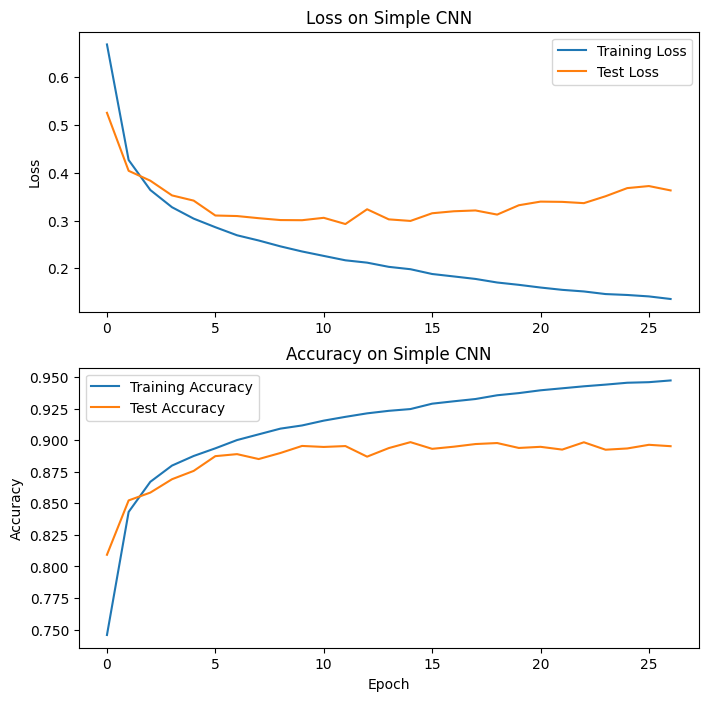

In [27]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(8, 8))  # Adjust the figsize as needed

ax1.set_title("Loss on Simple CNN")
# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.set_title("Accuracy on Simple CNN")
# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

## Best test loss for each batch size with it's corresponding accuracy

In [10]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% "
          f"accuracy")

Epoch 11 has 0.293 loss with 89.53% accuracy


# Simple CNN with Cutmix

In [11]:
model = GarmentClassifier().to(device)

In [12]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

cutmix_batch_tr_info, cutmix_batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="cutmix", cutmix=True,
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE,
                                              NUM_OF_WORKERS=NUM_OF_WORKERS)

Device: cuda:0
Epoch 1 Training...


100%|██████████| 1875/1875 [00:11<00:00, 164.22it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.61it/s] 


Epoch 1: Train_accuracy: 59.11%, Train_loss: 1.412084, Test_accuracy: 80.16%, Test_loss: 0.597720
Epoch 2 Training...


100%|██████████| 1875/1875 [00:11<00:00, 164.28it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.83it/s] 


Epoch 2: Train_accuracy: 67.13%, Train_loss: 1.214201, Test_accuracy: 82.61%, Test_loss: 0.539324
Epoch 3 Training...


100%|██████████| 1875/1875 [00:11<00:00, 170.18it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.36it/s] 


Epoch 3: Train_accuracy: 69.69%, Train_loss: 1.163888, Test_accuracy: 83.01%, Test_loss: 0.496306
Epoch 4 Training...


100%|██████████| 1875/1875 [00:10<00:00, 173.37it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.14it/s] 


Epoch 4: Train_accuracy: 70.91%, Train_loss: 1.125738, Test_accuracy: 84.87%, Test_loss: 0.476742
Epoch 5 Training...


100%|██████████| 1875/1875 [00:10<00:00, 173.40it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.86it/s] 


Epoch 5: Train_accuracy: 72.40%, Train_loss: 1.096914, Test_accuracy: 85.97%, Test_loss: 0.463240
Epoch 6 Training...


100%|██████████| 1875/1875 [00:11<00:00, 170.44it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.69it/s] 


Epoch 6: Train_accuracy: 72.08%, Train_loss: 1.085715, Test_accuracy: 86.67%, Test_loss: 0.414566
Epoch 7 Training...


100%|██████████| 1875/1875 [00:10<00:00, 174.20it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.21it/s] 


Epoch 7: Train_accuracy: 73.13%, Train_loss: 1.073665, Test_accuracy: 87.07%, Test_loss: 0.421147
Epoch 8 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.42it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.55it/s] 


Epoch 8: Train_accuracy: 72.92%, Train_loss: 1.063139, Test_accuracy: 87.50%, Test_loss: 0.397503
Epoch 9 Training...


100%|██████████| 1875/1875 [00:10<00:00, 176.75it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.56it/s] 


Epoch 9: Train_accuracy: 73.61%, Train_loss: 1.050425, Test_accuracy: 87.42%, Test_loss: 0.395943
Epoch 10 Training...


100%|██████████| 1875/1875 [00:10<00:00, 183.17it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.72it/s] 


Epoch 10: Train_accuracy: 73.76%, Train_loss: 1.048254, Test_accuracy: 87.47%, Test_loss: 0.399651
Epoch 11 Training...


100%|██████████| 1875/1875 [00:10<00:00, 177.78it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.24it/s] 


Epoch 11: Train_accuracy: 74.12%, Train_loss: 1.035851, Test_accuracy: 87.38%, Test_loss: 0.410731
Epoch 12 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.48it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.82it/s] 


Epoch 12: Train_accuracy: 74.31%, Train_loss: 1.033124, Test_accuracy: 87.37%, Test_loss: 0.401985
Epoch 13 Training...


100%|██████████| 1875/1875 [00:11<00:00, 161.95it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.59it/s] 


Epoch 13: Train_accuracy: 75.11%, Train_loss: 1.018738, Test_accuracy: 88.13%, Test_loss: 0.385999
Epoch 14 Training...


100%|██████████| 1875/1875 [00:11<00:00, 162.18it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.35it/s] 


Epoch 14: Train_accuracy: 74.83%, Train_loss: 1.020851, Test_accuracy: 88.01%, Test_loss: 0.383555
Epoch 15 Training...


100%|██████████| 1875/1875 [00:10<00:00, 180.20it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.94it/s] 


Epoch 15: Train_accuracy: 74.84%, Train_loss: 1.022564, Test_accuracy: 88.48%, Test_loss: 0.370495
Epoch 16 Training...


100%|██████████| 1875/1875 [00:10<00:00, 171.34it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.30it/s] 


Epoch 16: Train_accuracy: 75.36%, Train_loss: 1.012539, Test_accuracy: 88.10%, Test_loss: 0.390229
Epoch 17 Training...


100%|██████████| 1875/1875 [00:10<00:00, 176.52it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.91it/s] 


Epoch 17: Train_accuracy: 74.87%, Train_loss: 1.020340, Test_accuracy: 88.50%, Test_loss: 0.369943
Epoch 18 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.67it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.61it/s] 


Epoch 18: Train_accuracy: 75.14%, Train_loss: 1.010921, Test_accuracy: 88.38%, Test_loss: 0.362166
Epoch 19 Training...


100%|██████████| 1875/1875 [00:10<00:00, 172.48it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.44it/s] 


Epoch 19: Train_accuracy: 75.50%, Train_loss: 1.007714, Test_accuracy: 88.56%, Test_loss: 0.363356
Epoch 20 Training...


100%|██████████| 1875/1875 [00:10<00:00, 178.37it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.01it/s] 


Epoch 20: Train_accuracy: 75.41%, Train_loss: 1.009874, Test_accuracy: 88.79%, Test_loss: 0.373757
Epoch 21 Training...


100%|██████████| 1875/1875 [00:10<00:00, 180.65it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.50it/s] 


Epoch 21: Train_accuracy: 75.85%, Train_loss: 1.000691, Test_accuracy: 88.06%, Test_loss: 0.371552
Epoch 22 Training...


100%|██████████| 1875/1875 [00:10<00:00, 178.31it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.36it/s] 


Epoch 22: Train_accuracy: 75.85%, Train_loss: 1.002490, Test_accuracy: 88.79%, Test_loss: 0.364328
Epoch 23 Training...


100%|██████████| 1875/1875 [00:10<00:00, 178.66it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.09it/s] 


Epoch 23: Train_accuracy: 75.83%, Train_loss: 1.009593, Test_accuracy: 88.50%, Test_loss: 0.371512
Epoch 24 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.84it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.31it/s] 


Epoch 24: Train_accuracy: 75.86%, Train_loss: 1.003506, Test_accuracy: 87.95%, Test_loss: 0.391004
Epoch 25 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.69it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.94it/s] 


Epoch 25: Train_accuracy: 76.50%, Train_loss: 0.995375, Test_accuracy: 88.03%, Test_loss: 0.380762
Epoch 26 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.29it/s]


Epoch 26 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.43it/s] 


Epoch 26: Train_accuracy: 76.24%, Train_loss: 0.992038, Test_accuracy: 88.52%, Test_loss: 0.370431
Epoch 27 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.27it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.60it/s] 


Epoch 27: Train_accuracy: 76.23%, Train_loss: 0.994018, Test_accuracy: 88.96%, Test_loss: 0.376476
Epoch 28 Training...


100%|██████████| 1875/1875 [00:10<00:00, 179.16it/s]


Epoch 28 Testing...


100%|██████████| 313/313 [00:03<00:00, 80.42it/s] 


Epoch 28: Train_accuracy: 75.56%, Train_loss: 0.997028, Test_accuracy: 88.76%, Test_loss: 0.362001
Epoch 29 Training...


100%|██████████| 1875/1875 [00:10<00:00, 176.71it/s]


Epoch 29 Testing...


100%|██████████| 313/313 [00:04<00:00, 67.34it/s] 


Epoch 29: Train_accuracy: 76.73%, Train_loss: 0.981572, Test_accuracy: 87.34%, Test_loss: 0.386547
Epoch 30 Training...


100%|██████████| 1875/1875 [00:11<00:00, 158.04it/s]


Epoch 30 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.30it/s] 


Epoch 30: Train_accuracy: 76.32%, Train_loss: 0.991562, Test_accuracy: 88.47%, Test_loss: 0.373032
Epoch 31 Training...


100%|██████████| 1875/1875 [00:10<00:00, 174.07it/s]


Epoch 31 Testing...


100%|██████████| 313/313 [00:04<00:00, 78.01it/s] 


Epoch 31: Train_accuracy: 75.99%, Train_loss: 0.985706, Test_accuracy: 87.94%, Test_loss: 0.382479
Epoch 32 Training...


100%|██████████| 1875/1875 [00:10<00:00, 171.04it/s]


Epoch 32 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.25it/s] 


Epoch 32: Train_accuracy: 76.48%, Train_loss: 0.977429, Test_accuracy: 88.83%, Test_loss: 0.371466
Epoch 33 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.55it/s]


Epoch 33 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.29it/s] 


Epoch 33: Train_accuracy: 76.06%, Train_loss: 0.991802, Test_accuracy: 89.01%, Test_loss: 0.350805
Epoch 34 Training...


100%|██████████| 1875/1875 [00:11<00:00, 165.67it/s]


Epoch 34 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.28it/s] 


Epoch 34: Train_accuracy: 77.01%, Train_loss: 0.976321, Test_accuracy: 89.08%, Test_loss: 0.363835
Epoch 35 Training...


100%|██████████| 1875/1875 [00:10<00:00, 171.66it/s]


Epoch 35 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.10it/s] 


Epoch 35: Train_accuracy: 75.99%, Train_loss: 0.988919, Test_accuracy: 89.08%, Test_loss: 0.347722
Epoch 36 Training...


100%|██████████| 1875/1875 [00:10<00:00, 170.56it/s]


Epoch 36 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.23it/s] 


Epoch 36: Train_accuracy: 77.02%, Train_loss: 0.978059, Test_accuracy: 89.29%, Test_loss: 0.353398
Epoch 37 Training...


100%|██████████| 1875/1875 [00:11<00:00, 162.32it/s]


Epoch 37 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.05it/s] 


Epoch 37: Train_accuracy: 76.74%, Train_loss: 0.973869, Test_accuracy: 88.85%, Test_loss: 0.347082
Epoch 38 Training...


100%|██████████| 1875/1875 [00:11<00:00, 169.59it/s]


Epoch 38 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.23it/s] 


Epoch 38: Train_accuracy: 76.07%, Train_loss: 0.985073, Test_accuracy: 89.21%, Test_loss: 0.354053
Epoch 39 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.67it/s]


Epoch 39 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.93it/s] 


Epoch 39: Train_accuracy: 76.65%, Train_loss: 0.976355, Test_accuracy: 89.09%, Test_loss: 0.371902
Epoch 40 Training...


100%|██████████| 1875/1875 [00:11<00:00, 170.13it/s]


Epoch 40 Testing...


100%|██████████| 313/313 [00:03<00:00, 79.99it/s] 

Epoch 40: Train_accuracy: 76.90%, Train_loss: 0.973786, Test_accuracy: 89.22%, Test_loss: 0.345799


# Plot Simple CNN With Cutmix Loss and Accuracy

Import saved information

In [29]:
file_path = 'training_information/simple_cnn/cutmix/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    cutmix_batch_te_info = pickle.load(file)
file_path = 'training_information/simple_cnn/cutmix/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    cutmix_batch_tr_info = pickle.load(file)

Plot information

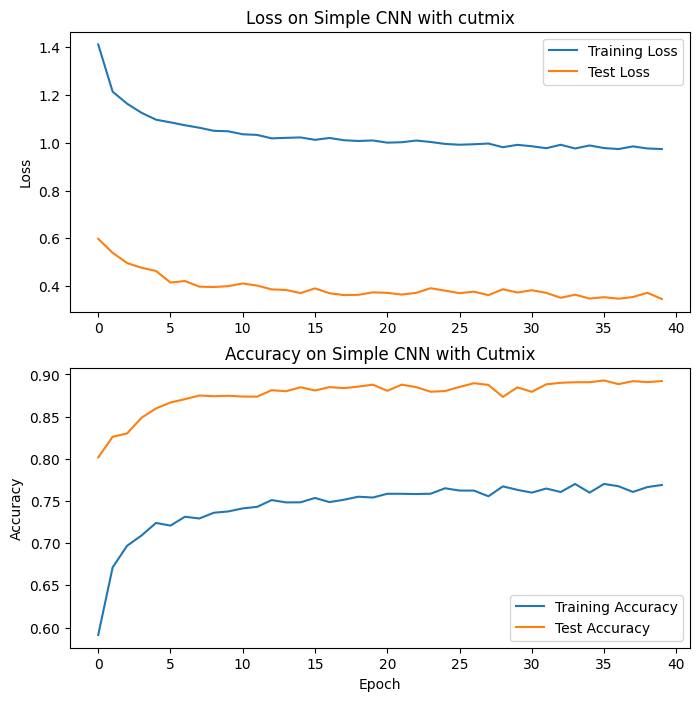

In [30]:
# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # Adjust the figsize as needed
ax1.set_title("Loss on Simple CNN with cutmix")
# Plot the training and test loss on the first subplot
ax1.plot(cutmix_batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(cutmix_batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.set_title("Accuracy on Simple CNN with Cutmix")
# Plot the training and test accuracy on the second subplot
ax2.plot(cutmix_batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(cutmix_batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

## Best test loss for each batch size with it's corresponding accuracy

In [31]:
for batch_size, info in cutmix_batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% accuracy")

Batch size 32: Epoch 39 has 0.346 loss with 89.22% accuracy
